# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Syarafat Syazwan
- **Email:** syarafatsyazwan36@gmail.com
- **ID Dicoding:** M172B4KY4260

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda harian berdasarkan musim, hari kerja, dan cuaca?
- Bagaimana pengaruh variabel cuaca dan suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

print(day_data.head())
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Data harian dan per jam berhasil dimuat
- Perlu dilakukan pengecekan lebih lanjut untuk memastikan integritas data

### Assessing Data

In [3]:
print(day_data.info())
print(hour_data.info())

print(day_data.isnull().sum())
print(hour_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ada missing values pada kedua dataset
- Beberapa kolom memiliki tipe data yang perlu diubah (misalnya, date menjadi datetime)

### Cleaning Data

In [4]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Mengubah kolom kategorikal menjadi tipe kategori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day_data[col] = day_data[col].astype('category')
    if col in hour_data.columns:
        hour_data[col] = hour_data[col].astype('category')

print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- Tipe data telah disesuaikan untuk analisis lebih lanjut
- Kolom kategorikal telah diubah menjadi tipe 'category' untuk efisiensi memori dan analisis

## Exploratory Data Analysis (EDA)

### Explore ...

### EDA Univariate

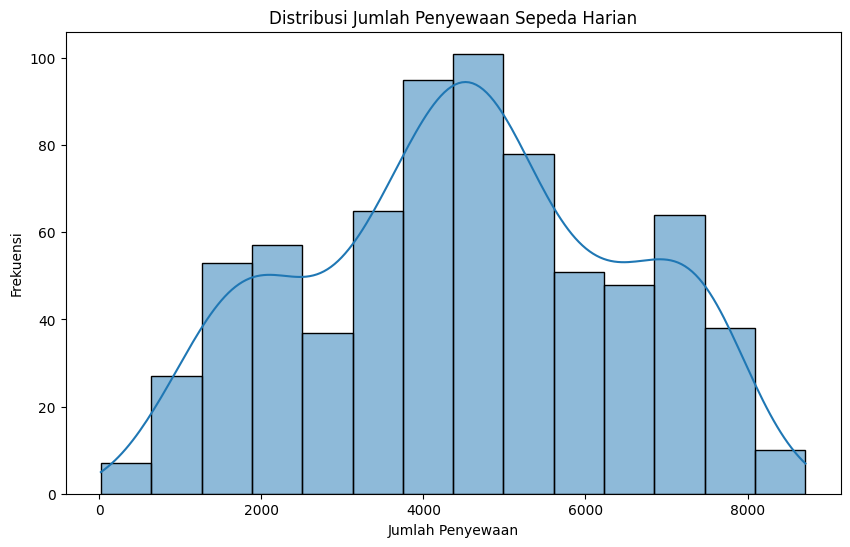

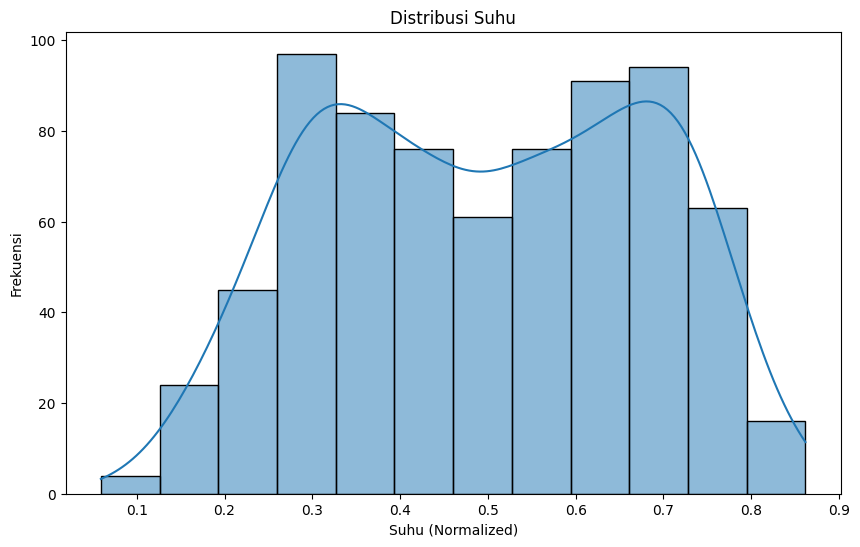

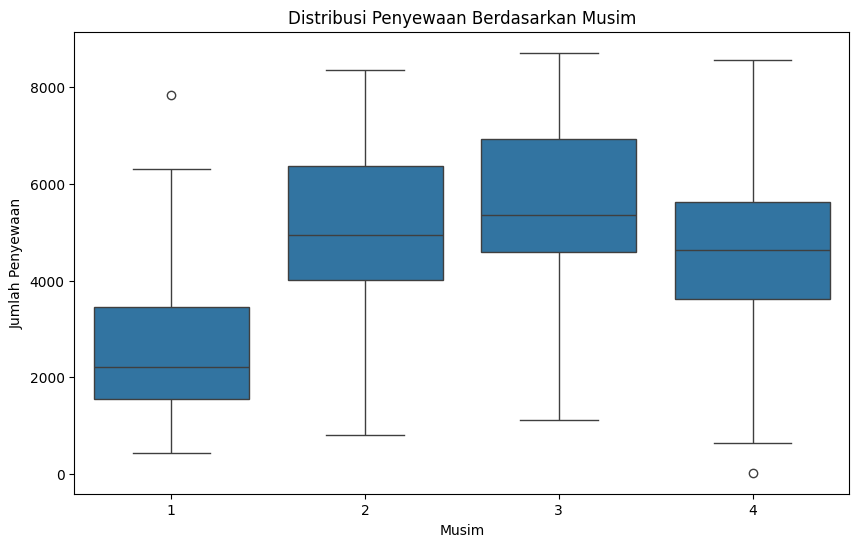

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi suhu
plt.figure(figsize=(10, 6))
sns.histplot(day_data['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Distribusi Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Distribusi jumlah penyewaan cenderung normal dengan sedikit skew ke kanan
- Suhu memiliki distribusi yang cenderung bimodal, menunjukkan pola musiman
- Musim mempengaruhi jumlah penyewaan, dengan musim panas dan gugur memiliki median yang lebih tinggi

### EDA Multivariate

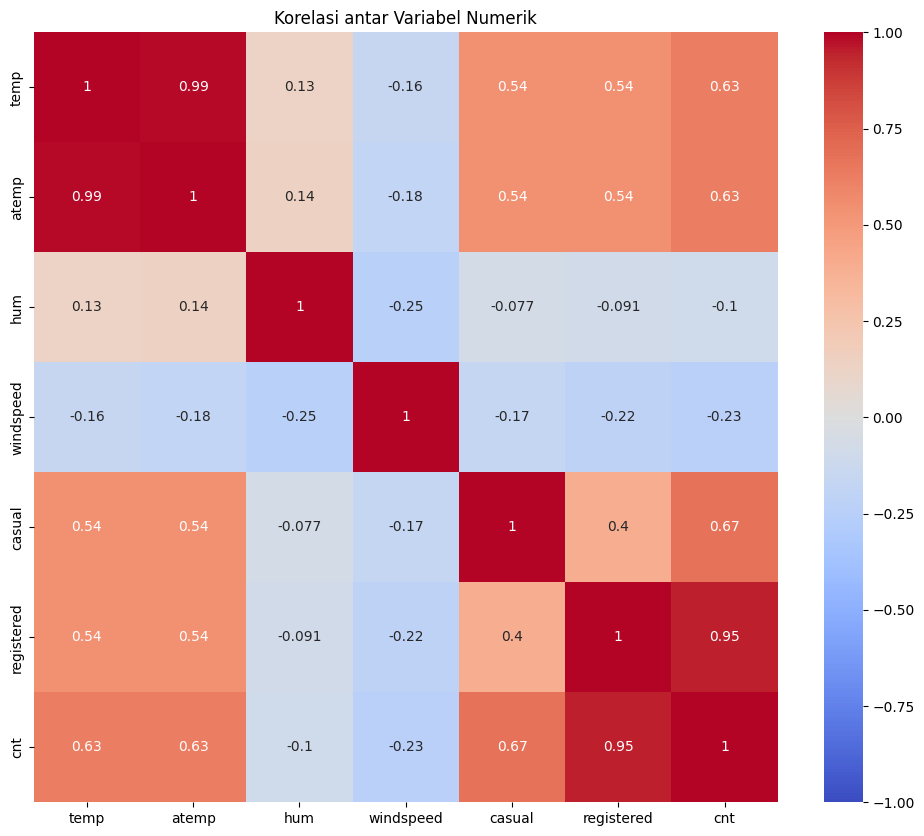

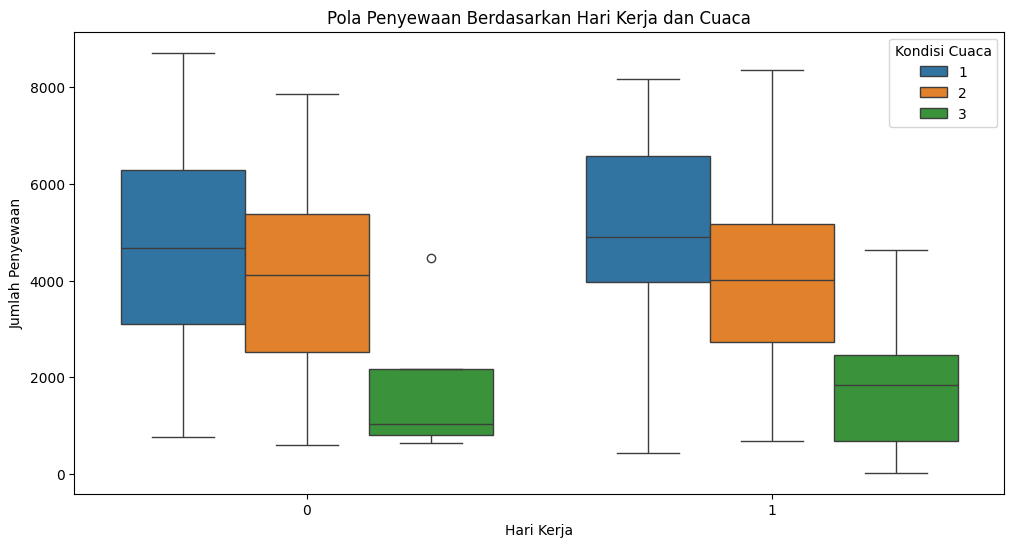

In [6]:
# Korelasi antar variabel numerik
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_matrix = day_data[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

# Pola penyewaan berdasarkan hari kerja dan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='workingday', y='cnt', hue='weathersit', data=day_data)
plt.title('Pola Penyewaan Berdasarkan Hari Kerja dan Cuaca')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kondisi Cuaca')
plt.show()

In [ ]:
**Insight:**
- Terdapat korelasi positif yang kuat antara suhu ('temp') dan jumlah penyewaan ('cnt')
- Hari kerja dan cuaca mempengaruhi pola penyewaan, dengan hari kerja cenderung memiliki jumlah penyewaan yang lebih tinggi


## Visualization & Explanatory Analysis

### Pertanyaan 1:

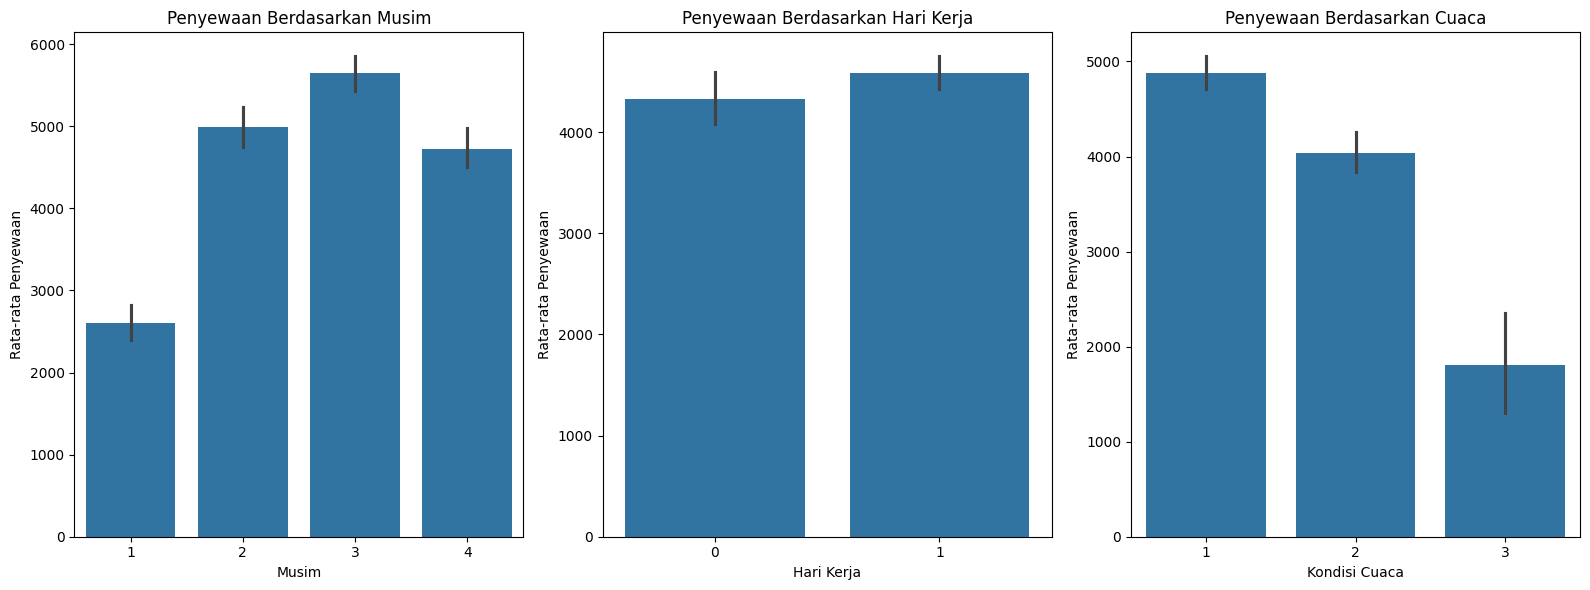

In [9]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='season', y='cnt', data=day_data)
plt.title('Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')

plt.subplot(1, 3, 2)
sns.barplot(x='workingday', y='cnt', data=day_data)
plt.title('Penyewaan Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Penyewaan')

plt.subplot(1, 3, 3)
sns.barplot(x='weathersit', y='cnt', data=day_data)
plt.title('Penyewaan Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

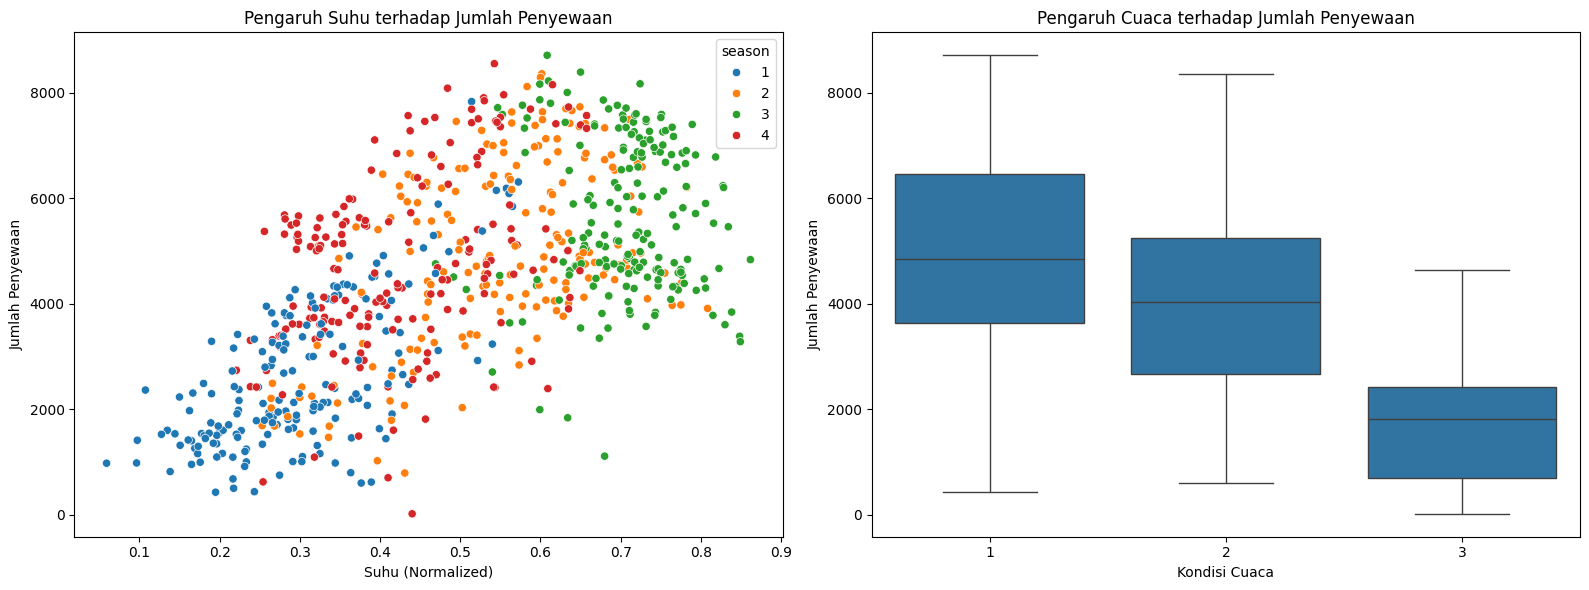

In [8]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='cnt', hue='season', data=day_data)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()


**Insight:**
- Musim panas dan musim gugur memiliki rata-rata penyewaan tertinggi
- Hari kerja memiliki rata-rata penyewaan yang lebih tinggi dibandingkan hari libur
- Cuaca yang cerah (kode 1) memiliki jumlah penyewaan tertinggi
- Terdapat korelasi positif antara suhu dan jumlah penyewaan
- Kondisi cuaca sangat mempengaruhi jumlah penyewaan, dengan cuaca buruk mengurangi jumlah penyewaan secara signifikan

## Analisis Lanjutan (Opsional)

## Conclusion

- - Pola penyewaan sepeda harian berdasarkan musim, hari kerja, dan cuaca:
  - Musim panas dan musim gugur memiliki jumlah penyewaan tertinggi
  - Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari libur
  - Cuaca yang cerah menghasilkan jumlah penyewaan tertinggi, sementara cuaca buruk mengurangi jumlah penyewaan secara signifikan

- Pengaruh variabel cuaca dan suhu terhadap jumlah penyewaan sepeda:
  - Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda
  - Kondisi cuaca sangat mempengaruhi jumlah penyewaan, dengan cuaca cerah menghasilkan jumlah penyewaan tertinggi dan cuaca buruk mengurangi jumlah penyewaan secara drastis
  - Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan, tetapi pengaruhnya bervariasi tergantung musim

Berdasarkan analisis ini, untuk meningkatkan jumlah penyewaan sepeda, disarankan untuk:
1. Meningkatkan promosi dan ketersediaan sepeda pada musim panas dan musim gugur
2. Menyediakan insentif khusus untuk penyewaan pada hari libur untuk meningkatkan jumlah penyewaan
3. Mempertimbangkan strategi pemasaran yang berbeda untuk kondisi cuaca yang berbeda, misalnya menawarkan diskon pada hari-hari dengan cuaca kurang baik
4. Memastikan ketersediaan sepeda yang cukup pada hari-hari dengan suhu yang lebih tinggi, terutama selama musim panas